# Implimenting a data science project in python 

### 1. Load data and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/imports-85.csv')
data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### 2. EDA

#### 2.1 Lets see the data info and shape

In [7]:
data.shape

(193, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 15 columns):
symboling            193 non-null int64
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-size          193 non-null int64
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null int64
peak-rpm             193 non-null int64
city-mpg             193 non-null int64
highway-mpg          193 non-null int64
price                193 non-null int64
dtypes: float64(7), int64(8)
memory usage: 22.7 KB


In [21]:
data.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

scaling. lets use a min max scaler.

#### 2.2 data description

In [11]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


what does it mean to have mean 13200 and median 10000? scewed.

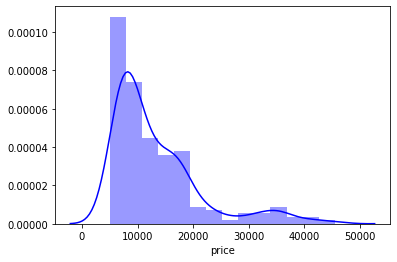

In [12]:
sns.distplot(data.price, color="b")

wht should we do? transform?? log transform.

### 3. Data Treatment

In [13]:
y = data.price
y.head() 

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [16]:
import numpy as np
y_logScale  =  np.log(y)
y_logScale.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

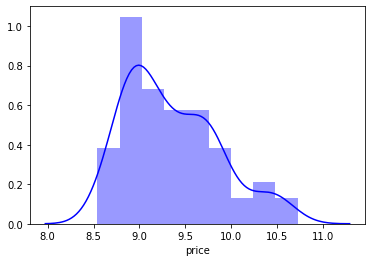

In [17]:
sns.distplot(y_logScale, color="b")

In [22]:
feature_cols = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']              
X = data[feature_cols]   

In [24]:
X.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


###  4. Selecting Variables for regression

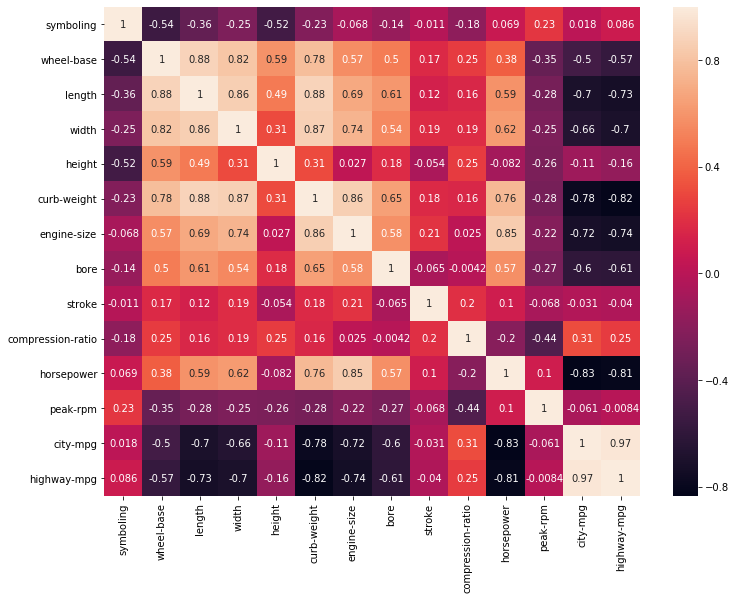

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

sns.heatmap(X.corr(), annot=True) 


In [33]:
feature_cols = ['symboling', 'width', 'height',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'peak-rpm', 'city-mpg']              
X_fresh = X[feature_cols]   

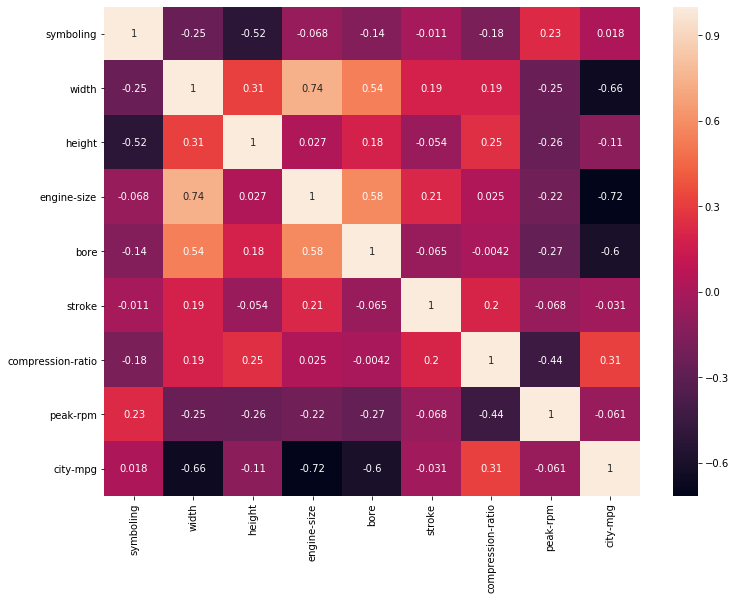

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

sns.heatmap(X_fresh.corr(), annot=True) 


### 5. Spilting in train and test

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_fresh)
X_scaled = scaler.transform(X_fresh)

In [56]:
data = pd.DataFrame(X_scaled)
data.head()

data.columns = ['symboling', 'width', 'height',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'peak-rpm', 'city-mpg']

data.head()

,symboling,width,height,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg
0,1.0,0.324786,0.083333,0.260377,0.664286,0.290476,0.1250,0.346939,0.222222
1,1.0,0.324786,0.083333,0.260377,0.664286,0.290476,0.1250,0.346939,0.222222
2,0.6,0.444444,0.383333,0.343396,0.100000,0.666667,0.1250,0.346939,0.166667
3,0.8,0.504274,0.541667,0.181132,0.464286,0.633333,0.1875,0.551020,0.305556
4,0.8,0.521368,0.541667,0.283019,0.464286,0.633333,0.0625,0.551020,0.138889


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data, y_logScale, test_size=0.20, random_state=1)

In [49]:
X_train.shape

(154, 9)

###  6. Using Linear Regression from sklearn

In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

y_pred_test_linR = linreg.predict(X_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linR)


RMSE for the test set is 0.040196745009352206


### 7. Model Evaluation

In [58]:
#RF Regression


#Rsquare values

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8643095895038413 0.8558289388478314


In [68]:
y_pred_test = linreg.predict(X_test)

#perticular record, one at a time..

In [73]:
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.iloc[[1]].head()

,0
1,8.90071


In [74]:
y_predict_orgScale  =  np.exp(y_pred_test.iloc[[1]])
y_predict_orgScale.head()

,0
1,7337.177561
